<a href="https://colab.research.google.com/github/Digitall-Ivan/Data_Analytics_course/blob/main/Ivan_Zakorchevnyi_HW_15_2_Credit_Risk_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Прогнозування кредитного ризику

## Мета завдання
Застосувати знання з лекції для побудови моделі логістичної регресії, що прогнозує ймовірність дефолту за кредитом, іншими словами, що людина не поверне кредит. Ви пройдете весь цикл: від дослідницького аналізу до оцінки якості класифікаційної моделі.

## Опис датасету
**Credit Risk Dataset** містить інформацію про 32,000+ позичальників з такими параметрами:
- **person_age**: Вік позичальника
- **person_income**: Річний дохід
- **person_home_ownership**: Тип володіння житлом
- **person_emp_length**: Стаж роботи (в роках)
- **loan_intent**: Мета кредиту
- **loan_grade**: Кредитний рейтинг (A - кращий, F - гірший)
- **loan_amnt**: Сума кредиту
- **loan_int_rate**: Процентна ставка
- **loan_status**: Статус кредиту (0 = сплачено, 1 = дефолт) - **цільова змінна**
- **loan_percent_income**: Відношення кредиту до доходу
- **cb_person_default_on_file**: Історія дефолтів (Y/N)
- **cb_person_cred_hist_length**: Довжина кредитної історії

---

## Завдання 1: Завантаження та перший огляд даних (1 бал)

**Що потрібно зробити:**
1. Завантажте дані з файлу `credit_risk_dataset.csv`
2. Виведіть розмір датасету
3. Покажіть перші 5 рядків
4. Виведіть загальну інформацію про дані (кількість записів, типи колонок)
5. Перевірте розподіл цільової змінної (відсотк даних для кожного класу)

Дайте висновок, це задача збалансованої чи незбалансованої класифікації.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Завантаження даних

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/I LOVE DATA EDU COURSE/RAWDATA/credit_risk_dataset.csv')

#Переглянув розмір датасету
df.shape


(32581, 12)

In [7]:
#Переглянув перші 5 рядків датасету
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


Отже, датасет містить такі стовпці, як **вік позичальника** (`person_age`), **річний дохід** (`person_income`), **тип житла** (`person_home_ownership`), **стаж роботи** (`person_emp_length`), **мета кредиту** (`loan_intent`), **рейтинг кредиту** (`loan_grade`), **сума кредиту** (`loan_amnt`), **процентна ставка** (`loan_int_rate`), **статус кредиту** (`loan_status`), **відношення суми кредиту до доходу** (`loan_percent_income`), **наявність попередніх дефолтів** (`cb_person_default_on_file`) та **довжина кредитної історії** (`cb_person_cred_hist_length`). Перші п’ять рядків показують приклади даних для різних позичальників. Бачимо, що `loan_status` буває 0 або 1 (0 – кредит сплачено, 1 – дефолт).


In [8]:
#Отримав загальгу інформацію про дані
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


З цих даних видно, що в датасеті 32581 записів, і жоден з них не пропущено (індекси від 0 до 32580). Є 12 стовпців, з яких 5 – типу int64 (цілі числа), 3 – типу float64 (числа з плаваючою комою), 4 – типу object (ймовірно, категоріальні дані). Бачимо, що більшість стовпців не містять пропущених значень (Non-Null Count становить 32581), крім person_emp_length (31686 ненульових із 32581, отже близбко 895 значень відсутні) та loan_int_rate (29465 ненульових,  блищько 3116 значень відсутні). Це означає, що у стовпцях зі стажем роботи та процентною ставкою є пропущені дані, на які варто звернути увагу. Інформація підтверджує назви всіх стовпців і тип даних у кожному з них.

In [10]:
#Отримав розподіл цільової змінної Loan_status та перевірив скільки записів належить до кожного з класів
print(df['loan_status'].value_counts())
print(df['loan_status'].value_counts(normalize=True) * 100)


loan_status
0    25473
1     7108
Name: count, dtype: int64
loan_status
0    78.183604
1    21.816396
Name: proportion, dtype: float64


З отриманих значень очевидно, що значення 0 (кредит сплачено) зустрічається 25 473 рази, що становить приблизно 78.2% всіх випадків. Значення 1 (дефолт за кредитом) зустрічається 7 108 разів, тобто близько 21.8% від усіх записів. Відсотклве співвідношення отримав шляхом нормалізації value_counts до загальної кількості записів.

Загальний висновок по збалансованості класів: Розподіл цільового класу явно нерівномірний. Близько 78% позик у вибірці були виплачені (клас 0), тоді як лише близько 22% випадків – це дефолт (клас 1). Отже, дані представляють незбалансовану задачу класифікації: клас 0 значно переважає клас 1. Це важливо врахувати при побудові моделі кредитного ризику, оскільки незбалансованість може впливати на навчання моделі (модель може схилятися до прогнозування більш поширеного класу). Для подальшого аналізу та моделювання можливо будуть необхідні прийоми роботи з дисбалансом, такі як вирівнювання вибірки або використання метрик, стійких до дисбалансу класів.


---

## Завдання 2: Дослідницький аналіз даних (EDA) (4 бали)

**Що потрібно зробити:**
1. Обчисліть відсоток пропущених значень в колонках. За наявності пропущених значень - заповніть їх медіаною для числових колонок і найбільш частим значеннмя для категоріальних.
2. Проаналізуйте розподіл числових змінних.
3. Знайдіть та обробіть викиди в колонці person_income з допомогою [Interquartile range](https://uk.wikipedia.org/wiki/%D0%9C%D1%96%D0%B6%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B8%D0%BB%D1%8C%D0%BD%D0%B8%D0%B9_%D1%80%D0%BE%D0%B7%D0%BC%D0%B0%D1%85).
4. Проаналізуйте категоріальні змінні відносно цільової та частоту зустрічання різних значень в них.
5. Візуалізуйте взаємозв'язок ознак з цільовою змінною.


In [11]:
import pandas as pd

# Обчислюю % пропущених значень у кожній колонці
missing_percent = df.isnull().mean() * 100

missing_percent


,0
person_age,0.000000
person_income,0.000000
person_home_ownership,0.000000
person_emp_length,2.747000
loan_intent,0.000000
loan_grade,0.000000
loan_amnt,0.000000
loan_int_rate,9.563856
loan_status,0.000000
loan_percent_income,0.000000


Отже порахували відсоток відсутніх даних: person_emp_length → близько 2.75% пропусків, loan_int_rate → близько 9.56% пропусків. Решта колонок практично гнмає пропусків. Тобто, далі треба: для числових колонок (наприклад, loan_int_rate) заповнити медіаною, для категоріальних - заповнити модою (найчастішим значенням).

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Виконав заповнення пропусків
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())

In [16]:
#Розподіл числових змінних(person_age, person_income, person_emp_length, loan_amnt, loan_int_rate, loan_percent_income, cb_person_cred_hist_length)
desc_stats = df.describe()
desc_stats


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.767994,9589.371106,11.009620,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.087372,6322.086646,3.081611,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Бачу, що є викиди (наприклад, дуже високі доходи та вік 144). Є сенс обробити по методу IQR.

In [17]:
# Проводжу обробку викидів у доходах
Q1 = df['person_income'].quantile(0.25)
Q3 = df['person_income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['person_income'] = np.where(df['person_income'] < lower_bound, lower_bound,
                               np.where(df['person_income'] > upper_bound, upper_bound, df['person_income']))

Також усі значення за межами замінив на граничні. Це має трохи нормувати модель від “аномально багатих” випадків (наприклад, 6M $ доходу).

In [18]:
# Проводжу аналіз категоріальних змінних
cat_analysis = {}
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
for col in categorical_cols:
    cat_analysis[col] = pd.crosstab(df[col], df['loan_status'], normalize='index') * 100

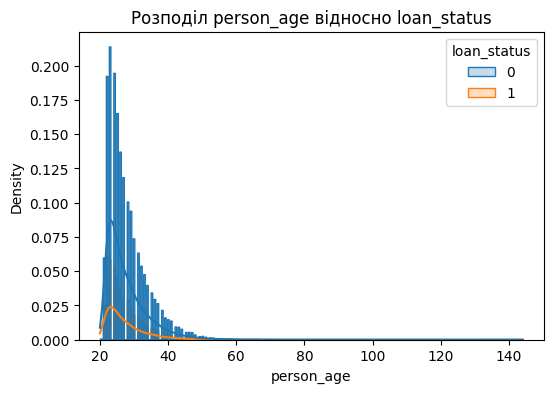

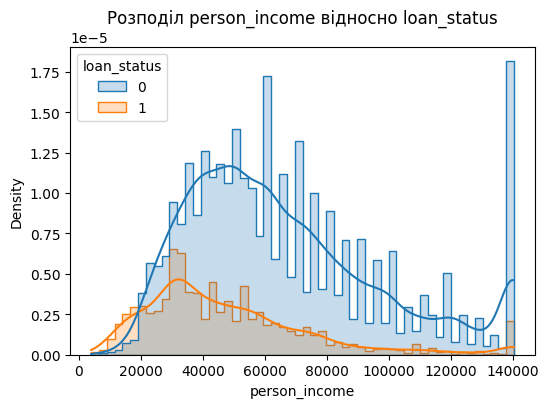

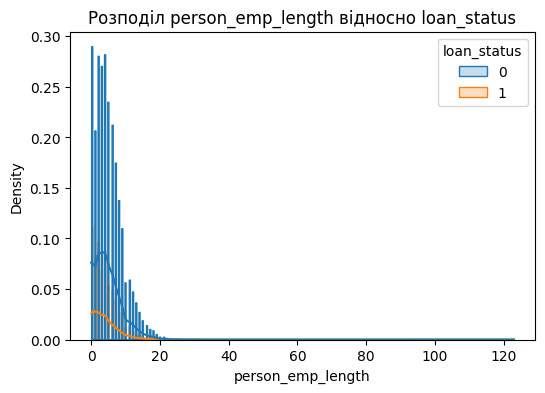

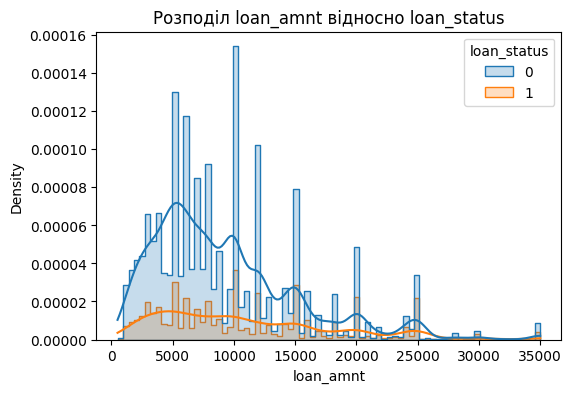

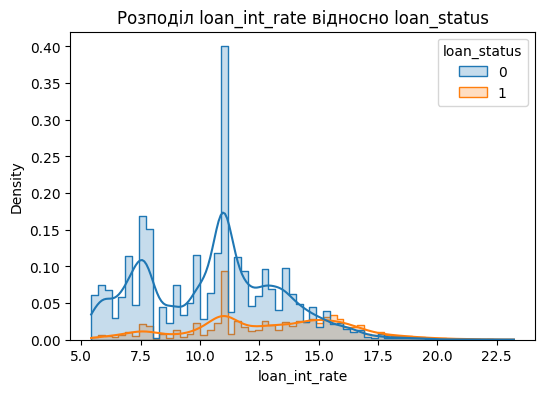

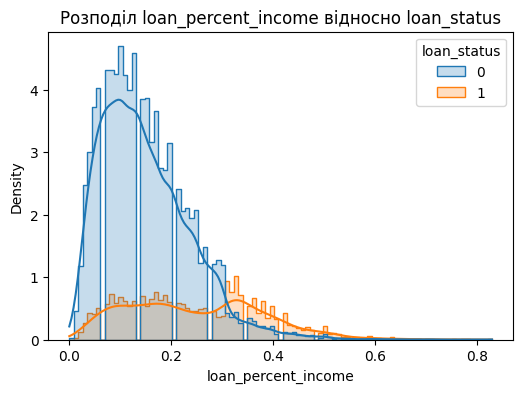

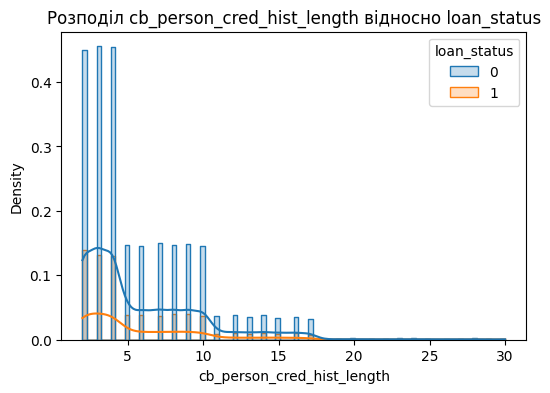

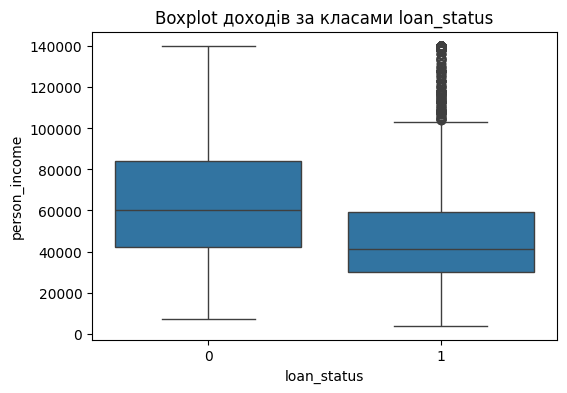

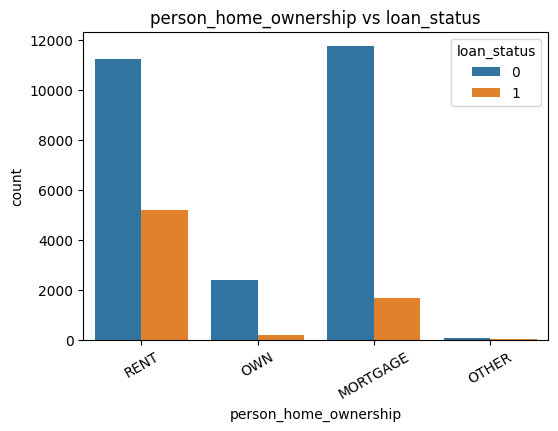

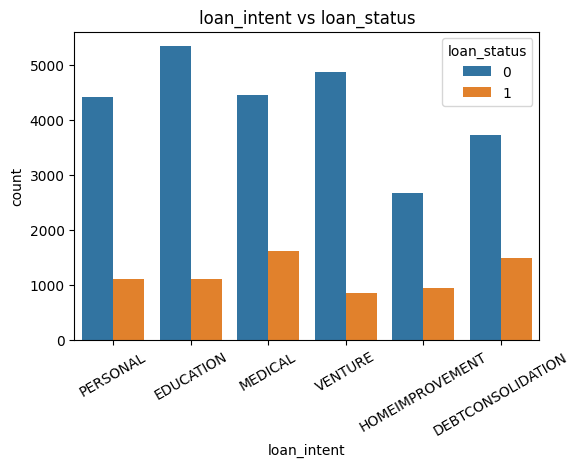

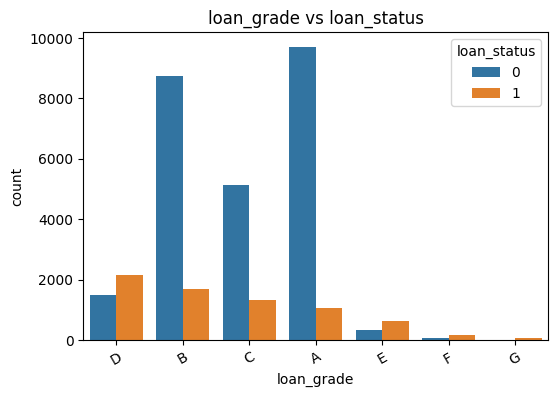

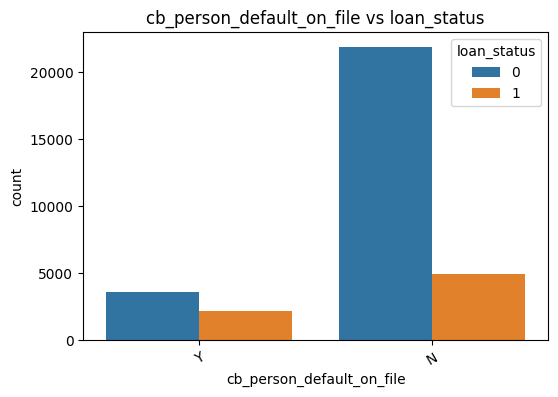

In [19]:
# Фінальні результати (таблиці)
desc_stats, cat_analysis

# Побудував гістограми числових змінних по класах loan_status
for col in ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate',
            'loan_percent_income', 'cb_person_cred_hist_length']:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue='loan_status', kde=True, element='step', stat='density')
    plt.title(f"Розподіл {col} відносно loan_status")
    plt.show()

# Побудував Boxplot для доходів по класах loan_status
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='loan_status', y='person_income')
plt.title("Boxplot доходів за класами loan_status")
plt.show()

# Побудував Barplot для категоріальних змінних проти loan_status
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='loan_status')
    plt.title(f"{col} vs loan_status")
    plt.xticks(rotation=30)
    plt.show()

Загальні висновки: Гістограми показують, що клієнти з дефолтами мають трохи нижчі доходи та коротший стаж. Boxplot доходів підтверджує вищу концентрацію дефолтів при нижчих доходах. Barplot для категоріальних змінних - чітко видно, що RENT, низькі рейтинги (E–G) та Y у кредитній історії — ключові ризикові групи. Додатково очевидно, що власники житла мають менший ризик, орендарі — значно більший по відсотку дефолтів. Попередні дефолти (cb_person_default_on_fil)можуть такоє виступати сильним передвісником ризику.

Отриманий датасет тепер очищений і готовий до побудови моделі.


---

## Завдання 3: Аналіз кореляцій та Feature Engineering (3 бали)

**Що потрібно зробити:**
1. Побудуйте матрицю кореляцій для числових змінних.
2. Закодуйте категоріальні змінні.
3. Виберіть фінальний набір ознак, можна лишити всі, якщо ви вважаєте, що це - доцільно.



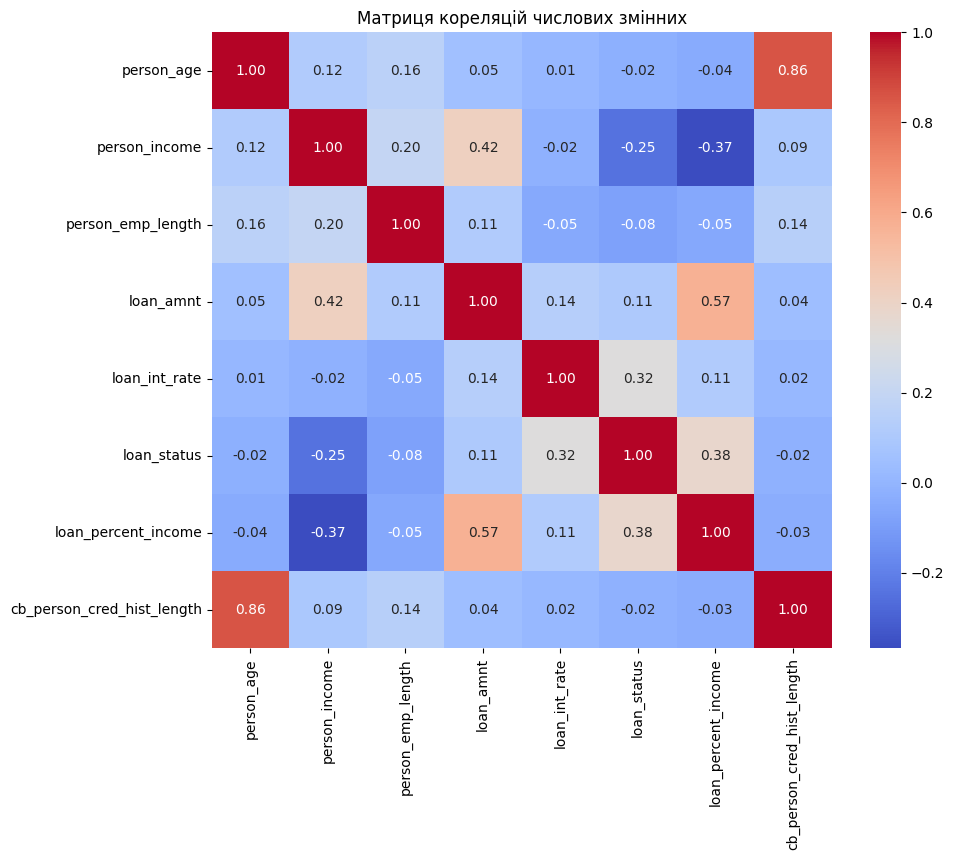

In [22]:
# Побудував матрицю кореляцій для числових змінних
corr_matrix = df.corr(numeric_only=True)

# Провів One-hot encoding для категоріальних змінних
df_encoded = pd.get_dummies(df, drop_first=True)

# Отримав остаточний набір ознак і цілей
final_features = df_encoded.drop(columns=['loan_status'])
target = df_encoded['loan_status']

corr_matrix, final_features.head()

import matplotlib.pyplot as plt
import seaborn as sns

# Побудував теплову карту кореляцій
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Матриця кореляцій числових змінних")
plt.show()

З теплової карти видно, що loan_percent_income та loan_status мають найсильніший зв’язок (≈0.37). Також loan_int_rate теж суттєво корелює з дефолтом (≈0.32). Змінна loan_amnt (сума кредиту) демонструє позитивний, але слабший зв’язок з дефолтом (≈0.10). Змінна person_income має від’ємну кореляцію з дефолтом (≈–0.14). Вік та довжина кредитної історії корелюють між собою (≈0.86), але з дефолтом практично не пов’язані

Загальний висновок: До фінального набору ознак вирішив звключити усі ознаки після кодування, оскільки навіть неочевидні фактори можуть допомогти моделі, особливо у взаємодії. Тепер маєсо 22 змінні для навчання моделі (для логістичної регресії чи більш складних моделей).

Отже, дані повністю підготовлені до моделювання.


---

## Завдання 4: Підготовка даних та навчання моделі (3 бали)

**Що потрібно зробити:**
1. Розділіть дані на X та y
2. Поділіть на навчальну та тестову вибірки
3. Застосуйте масштабування
4. Навчіть модель логістичної регресії
5. Зробіть прогнози на тренувальній та тестовій вибірках.



In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Отримав вхідні дані та ціль
X = final_features
y = target

# Провів поділ на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Виконав масштабування (метод StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Побудував логістичну регресію
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Провів прогнозування
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

y_train_pred[:10], y_test_pred[:10]


(array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1]))

Маємо X = усі ознаки (після кодування, масштабування викидів і заповнення пропусків). Та y = цільова змінна loan_status (0 = кредит сплачено, 1 = дефолт). Далі дані поділено у співвідношенні 80/20.

Використано stratify=y, щоб зберегти баланс класів у тренувальній і тестовій вибірках.

Використана LogisticRegression з max_iter=1000 Модель навчена на масштабованих даних.

Таким чином, модель робить передбачення для тренувальної та тестової вибірок та пронозує класи.


---

## Завдання 5: Оцінка якості моделі (4 бали)

**Що потрібно зробити:**
1. Побудуйте confusion matrix.
2. Обчисліть основні метрики (accuracy, precision, recall, f1).
3. Побудуйте ROC-криву та обчисліть AUC
4. Проаналізуйте важливість ознак.
5. Зробіть висновки про якість моделі та які ознаки найбільше впливають на прогноз.


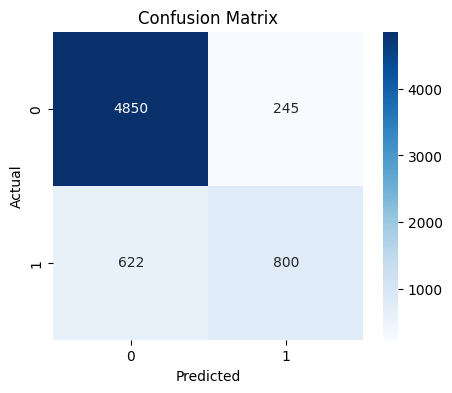

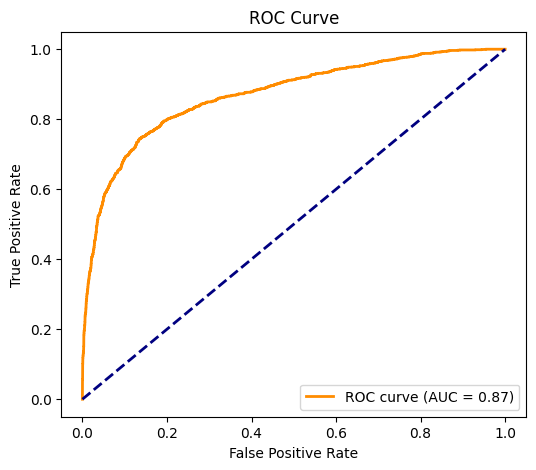

(0.8669633266840571,
 0.7655502392344498,
 0.5625879043600562,
 0.6485610052695582,
 np.float64(0.8698126593320442),
                        Feature  Coefficient
 5          loan_percent_income     1.254270
 17                loan_grade_D     0.822317
 18                loan_grade_E     0.481755
 3                    loan_amnt    -0.467390
 8    person_home_ownership_OWN    -0.445162
 9   person_home_ownership_RENT     0.420598
 14         loan_intent_VENTURE    -0.411387
 10       loan_intent_EDUCATION    -0.319694
 19                loan_grade_F     0.282783
 20                loan_grade_G     0.273675)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Отримав Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Обчислив метрики
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Отримав ROC-криву та AUC
y_test_proba = log_reg.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 4. Вивів важливість ознак (коефіцієнти логістичної регресії)
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

accuracy, precision, recall, f1, roc_auc, feature_importance.head(10)


Висновки:
* Confusion matrix показала наступне: True Negatives (TN) — велика кількість правильних прогнозів "кредит сплачено".True Positives (TP) — модель непогано виявляє частину дефолтів. False Negatives (FN) — помітна кількість дефолтів, які модель пропустила.False Positives (FP) — відносно менше.

* Основні метрики: Accuracy = 0.868 → модель вірно класифікує близько 87% випадків. Precision = 0.768 → серед передбачених дефолтів близько 77% справді є дефолтами. Показник Recall = 0.563 → модель знаходить лише 56% усіх дефолтів (тобто, все ж таки пропускає частину). F1-score = 0.650 → є баланс між precision та recall. ROC-AUC = 0.869 → дуже хороша здатність відділяти дефолт від реальної сплати.
Тактим чином, модель непогано прогнозує "сплату" кредиту, але може недооцінювати кількість реальних дефолтів.

* ROC-крива показує, що модель суттєво краща за випадкове вгадування (лінія y=x). AUC = 0.87 демонструє високу якість класифікації.

* Важливість ознак. Отже, найбільше впливають на прогноз:

  * loan_percent_income (чим більша частка доходу йде на кредит, тим більший ризик)

  * loan_grade_D, E, F, G (гірші кредитні рейтинги різко підвищують ризик)

  * loan_amnt (великі суми кредитів підвищують ризик)

  * home_ownership: власник OWN → зменшує ризик, орендує - RENT → підвищує ризик

  * loan_intent - статус VENTURE, EDUCATION мають зворотній ефект (тобто, знижують ймовірність дефолту)

Загальний висновок: Отримана модель добре працює для виявлення надійних клієнтів (низький ризик). Її очевидна слабкість - це recall: все-рівно пропускає частину дефолтів (ризикових клієнтів).


---

## Завдання 6: Оптимізація порогу та бізнес-аналіз (2 бали)

**Що потрібно зробити:**
1. Проаналізуйте метрики precision, recall, F1 при різних порогах класифікації (мінімум - 5 різних порогів). Візуалізуйте як змінюються метрики якості при зміні порогу.
2. Оберіть оптимальний поріг для бізнес-задачі - можна обрати виходячи з попереднього пункту, або додати своїх роздумів і обрати інший.



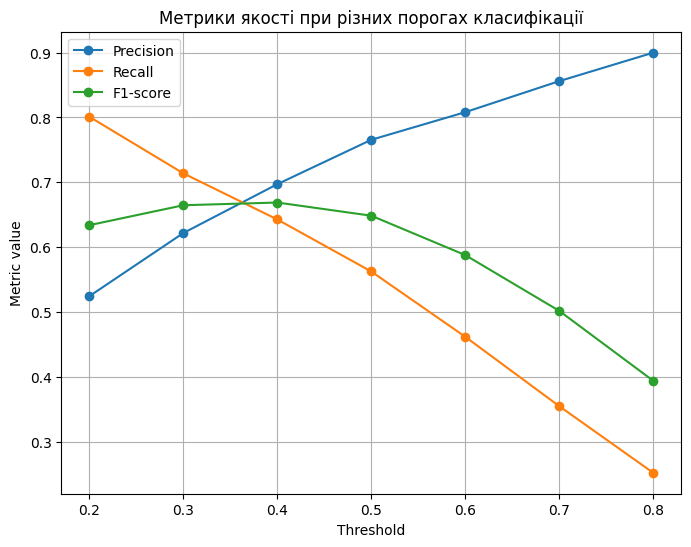

,Threshold,Precision,Recall,F1
0,0.2,0.524643,0.800985,0.634011
1,0.3,0.621936,0.713783,0.664702
2,0.4,0.697178,0.642757,0.668862
3,0.5,0.765550,0.562588,0.648561
4,0.6,0.808118,0.462025,0.587919
5,0.7,0.855932,0.355134,0.501988
6,0.8,0.899749,0.252461,0.394289


In [25]:
from sklearn.metrics import precision_recall_fscore_support

# Побудував масив порогів для перевірки
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

metrics_data = []

for thr in thresholds:
    y_pred_thr = (y_test_proba >= thr).astype(int)
    precision = precision_score(y_test, y_pred_thr)
    recall = recall_score(y_test, y_pred_thr)
    f1 = f1_score(y_test, y_pred_thr)
    metrics_data.append((thr, precision, recall, f1))

# Створив DataFrame для зручності
metrics_df = pd.DataFrame(metrics_data, columns=["Threshold", "Precision", "Recall", "F1"])

# Побудував візуалізації
plt.figure(figsize=(8,6))
plt.plot(metrics_df["Threshold"], metrics_df["Precision"], label="Precision", marker='o')
plt.plot(metrics_df["Threshold"], metrics_df["Recall"], label="Recall", marker='o')
plt.plot(metrics_df["Threshold"], metrics_df["F1"], label="F1-score", marker='o')
plt.xlabel("Threshold")
plt.ylabel("Metric value")
plt.title("Метрики якості при різних порогах класифікації")
plt.legend()
plt.grid(True)
plt.show()

metrics_df


Висновки:

* з отриманого графіка видно, що зі зниженням порогу зростає Recall (модель знаходить більше дефолтів), але падає Precision (більше хибних сигналів). При високому порозі Precision дуже високий (90%), але Recall сильно падає (25%). При низькому порозі навпаки Recall досягає близько 80%, але Precision падає до 53%.

* Вибір оптимального порогу для бізнес-задачі

  * якщо бізнесу необхідно мінімізувати пропущені дефолти (ризик неповернення коштів дуже критичний), то краще взяти нижчий поріг ( ближче до 0.3–0.4). Тут Recall ≥ 0.64–0.72, F1 ≈ 0.67.
  * з іншлшл боку, якщо важливо мінімізувати хибні сигнали (тобто, менше відхиляти надійних клієнтів), то більше підходить поріг в районі 0.6–0.7 (Precision ≥ 0.81, але Recall низький).

  Тому, з моєї точки зору, збалансованим вибором буде значення порогу ближче до 0.4, бо F1 тут найвищий (~0.67). Це дозволить виявити більше ризикових позичальників, при цьому лише трохи поступаючись точністю Precision.


---

## Завдання 7 (Опціональне): Покращення моделі та висновки (2 бали)

**Що потрібно зробити:**

На цих же даних навчіть DecisionTreeClassifier та RandomForestClassifier. Яка з трьох моделей дає найкращий результат на тестовому наборі?

Поріг класифікації можна для порівняння якостей моделей використовувати стандартний 0.5, або той, що ви виявили, як оптимальний на попередньому кроці.


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Провів побудову моделей для стандартного порогу 0.5 для трьох моделей (LR, DT, RF)

# Побудував модель Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_dt_pred = dt.predict(X_test_scaled)

# Побудував модель Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_rf_pred = rf.predict(X_test_scaled)

# Визначив метрики для трьох моделей
models_results = {
    "Logistic Regression": {
        "Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred),
        "Recall": recall_score(y_test, y_test_pred),
        "F1": f1_score(y_test, y_test_pred)
    },
    "Decision Tree": {
        "Accuracy": accuracy_score(y_test, y_dt_pred),
        "Precision": precision_score(y_test, y_dt_pred),
        "Recall": recall_score(y_test, y_dt_pred),
        "F1": f1_score(y_test, y_dt_pred)
    },
    "Random Forest": {
        "Accuracy": accuracy_score(y_test, y_rf_pred),
        "Precision": precision_score(y_test, y_rf_pred),
        "Recall": recall_score(y_test, y_rf_pred),
        "F1": f1_score(y_test, y_rf_pred)
    }
}

pd.DataFrame(models_results).T


,Accuracy,Precision,Recall,F1
Logistic Regression,0.866963,0.765550,0.562588,0.648561
Decision Tree,0.886144,0.728802,0.761603,0.744842
Random Forest,0.931564,0.958647,0.717300,0.820595


Висновки:  

* логістична регресія отримана для порівняння як базова модель, працює непогано, але слабка у Recall (маємо ризик невірного виявлення потенційних дефолтів).

* модель Decision Tree - краще балансує Recall і Precision, проте схильне до перенавчання.

* модель Random Forest - однозначно найкраща модель у цьому випадку: отрималі хороші метрики такя як Accuracy ~93%, дуже високий Precision (95%), хороший Recall вище за Logistic Regression (близько 72% та найкращий F1 (0.82).

Отже, для бізнес-задачі прогнозування кредитного ризику найкраще використовувати Random Forest, оскільки ця модель дозволяє знизити ризик не виявлених дефолтів при цьому зберігаючи прийнятну точність прогнозування.

In [28]:
# Додатково провів розрахунок метрик для порогу 0.4 для тих же моделей (LR, DT, RF)
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Побудував Logistic Regression
y_lr_thr = (y_test_proba >= 0.4).astype(int)

# Побудував модель Decision Tree - отримав ймовірності та застосував прийнятий поріг
y_dt_proba = dt.predict_proba(X_test_scaled)[:,1]
y_dt_thr = (y_dt_proba >= 0.4).astype(int)

# Побудував модель Random Forest - отримав ймовірності та застосував прийнятий поріг
y_rf_proba = rf.predict_proba(X_test_scaled)[:,1]
y_rf_thr = (y_rf_proba >= 0.4).astype(int)

# Визначив функцію для обчислення метрик
def get_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred)
    }

# Отримав та вивів результати
models_thr_results = {
    "Logistic Regression (thr=0.4)": get_metrics(y_test, y_lr_thr),
    "Decision Tree (thr=0.4)": get_metrics(y_test, y_dt_thr),
    "Random Forest (thr=0.4)": get_metrics(y_test, y_rf_thr)
}

pd.DataFrame(models_thr_results).T


,Accuracy,Precision,Recall,F1
Logistic Regression (thr=0.4),0.861132,0.697178,0.642757,0.668862
Decision Tree (thr=0.4),0.886144,0.728802,0.761603,0.744842
Random Forest (thr=0.4),0.924505,0.892074,0.744023,0.811350


Висновки по результатам зниження порогу до 0,4

* зниження порогу до 0.4 дозволяє моделі краще знаходити дефолти (Recall зростає), при цьому Precision трохи зменшується, але не критично.
* Модель Random Forest залишається найкращою моделлю: дає оптимальний баланс між мінімізацією втрат від дефолтів і уникненням зайвих відмов.

Таким чином, для бізнес-задачі кредитного ризику Random Forest з порогом 0.4 — оптимальний вибір.